In [38]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,datetime,time,math,itertools,os,sys

import torch
import torch.nn as nn
from torch.nn import functional as F

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout,BatchNormalization,Concatenate

import pandas as pd

from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_excel('./data/FunnelValueGC_CKAs.xlsx')

In [40]:
le = LabelEncoder()
df['ACC'] = le.fit_transform(df['Account Name (MainAccount)'])

In [41]:
df[df['ACC']==0]

,Account Name (MainAccount),OLI.Close Date,Funnel Value (GC),ACC
0,ADVENTHEALTH,2013-01-14,30661.082860,0
1,ADVENTHEALTH,2013-02-11,0.000000,0
2,ADVENTHEALTH,2013-02-14,0.000000,0
3,ADVENTHEALTH,2013-02-15,0.000000,0
4,ADVENTHEALTH,2013-02-22,0.749653,0
...,...,...,...,...
388,ADVENTHEALTH,2020-12-24,3001.938064,0
389,ADVENTHEALTH,2020-12-28,75460.805740,0
390,ADVENTHEALTH,2020-12-29,3001.938064,0
391,ADVENTHEALTH,2020-12-30,3001.938064,0


In [73]:
df0 = df[['OLI.Close Date','Funnel Value (GC)']].groupby('OLI.Close Date').sum()
df0 = pd.DataFrame(index=pd.date_range(start=df0.index.min(),end=df0.index.max(),freq='D')).merge(df0,left_index=True,right_index=True)

<AxesSubplot:>

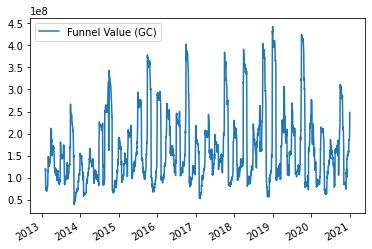

In [78]:
df0.rolling(30).sum().plot()